In [116]:
from __future__ import absolute_import, division, print_function
from builtins import (
    ascii, bytes, chr, dict, filter, hex, input, int, map,
    next, oct, open, pow, range, round, str, super, zip)

import os
from itertools import cycle
import random

import psycopg2
from shapely.geometry import shape, MultiPolygon
from descartes import PolygonPatch
from osgeo import ogr, gdal
import osr
import fiona
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from matplotlib.colors import to_rgb
from matplotlib.patches import Polygon
%matplotlib inline

In [2]:
psql_pass = os.environ['PSQL_PASS']

In [3]:
conn = psycopg2.connect(
    database='wisc_gerry',
    user='pmende',
    password=psql_pass,
    host='localhost'
)

In [7]:
cur = conn.cursor()

In [77]:
cong_shp_file = 'data/districts/congressional/Wisconsin_Congressional_Districts.shp'

In [99]:
driver = ogr.GetDriverByName('ESRI Shapefile')

In [118]:
inSpatialRef = osr.SpatialReference()
inSpatialRef.ImportFromEPSG(4326)
outSpatialRef = osr.SpatialReference()
outSpatialRef.ImportFromEPSG(3857)
coord_transform = osr.CoordinateTransformation(inSpatialRef, outSpatialRef)

In [126]:
cong_shapes = driver.Open(cong_shp_file, 0)
cong_layer = cong_shapes.GetLayer()
cong_layer.CreateField(new_field)
for feature in cong_layer:
    geom = feature.GetGeometryRef()
    geom.Transform(coord_transform)
    area = geom.Area()
    perimeter = geom.Boundary().Length()
    ratio = area/perimeter**2
    print('area: ', area/1000000)
    print('perimeter: ', perimeter)
    print('A/C^2: ', ratio)
    print('~~~~~~')

area:  126842.058028
perimeter:  3203653.25524
A/C^2:  0.0123586852269
~~~~~~
area:  35686.7968518
perimeter:  2035392.83809
A/C^2:  0.00861412331435
~~~~~~
area:  25264.1582883
perimeter:  1438210.26499
A/C^2:  0.0122140604591
~~~~~~
area:  8521.98916219
perimeter:  588300.64639
A/C^2:  0.024623077183
~~~~~~
area:  9530.3757008
perimeter:  709140.074937
A/C^2:  0.0189516035871
~~~~~~
area:  22321.0243867
perimeter:  806464.425124
A/C^2:  0.0343197166031
~~~~~~
area:  57377.7425102
perimeter:  2080613.07065
A/C^2:  0.0132544225673
~~~~~~
area:  627.196849215
perimeter:  249734.012721
A/C^2:  0.0100565374919
~~~~~~


In [91]:
with fiona.open(cong_shp_file) as f:
    for shp in f:
        pass
    districts = [
        {
            'shape': shape(polygon['geometry']), 
             'District': polygon['properties']['District_N']
        }
        for polygon in f
    ]

for district in districts:
    print(district['shape'].area)
    print(district['shape'].length)

7.16166264143
24.5915203682
2.04260153826
15.3248244562
1.47162616663
11.0751516293
0.505298710035
4.69955537864
0.560631097691
5.46641562794
1.31765074266
6.35814620083
3.32629014458
15.8610695388
0.0369773163068
1.91945767524


0 7
1 8
2 6
3 1
4 5
5 2
6 3
7 4


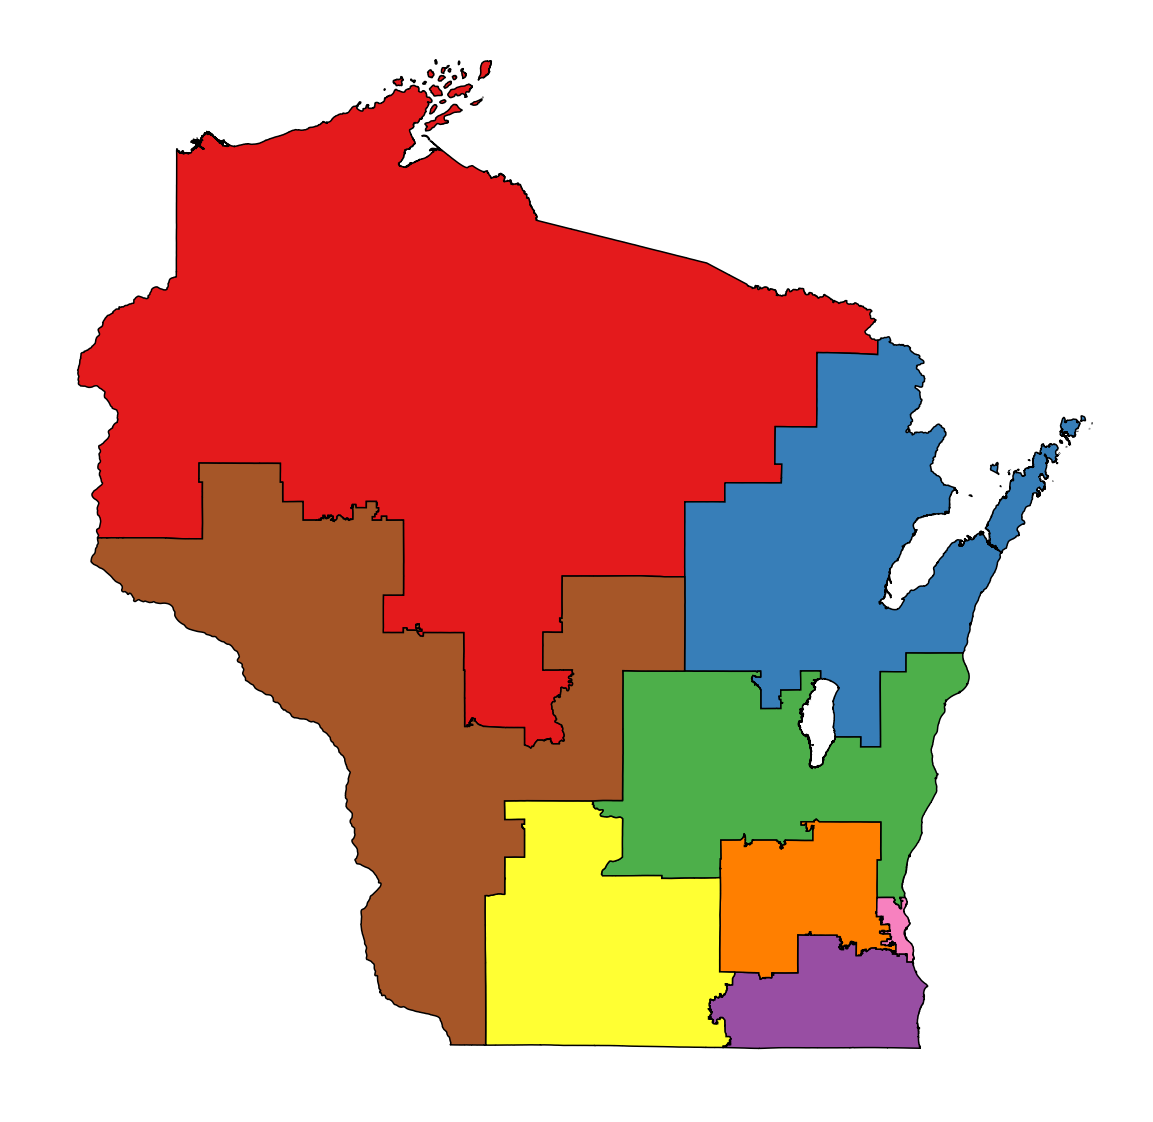

In [62]:
congressional_patches = [
    PolygonPatch(dis['shape'])
    for dis in districts
]

hex_colors = [
    '#e41a1c', '#377eb8', '#4daf4a', '#984ea3',
    '#ff7f00', '#ffff33', '#a65628', '#f781bf'
]
colors = [to_rgb(color) for color in hex_colors]
for patch, color in zip(congressional_patches, cycle(colors)):
    patch.set_facecolor(color)
    patch.set_linewidth(1.5)

fig, ax = plt.subplots(figsize=(20,20))

for patch in congressional_patches:
    ax.add_patch(patch)
    
ax.relim()
ax.autoscale_view()
ax.axis('off');

In [89]:
fig.savefig('images/congressional_districts.png', bbox_inches='tight')

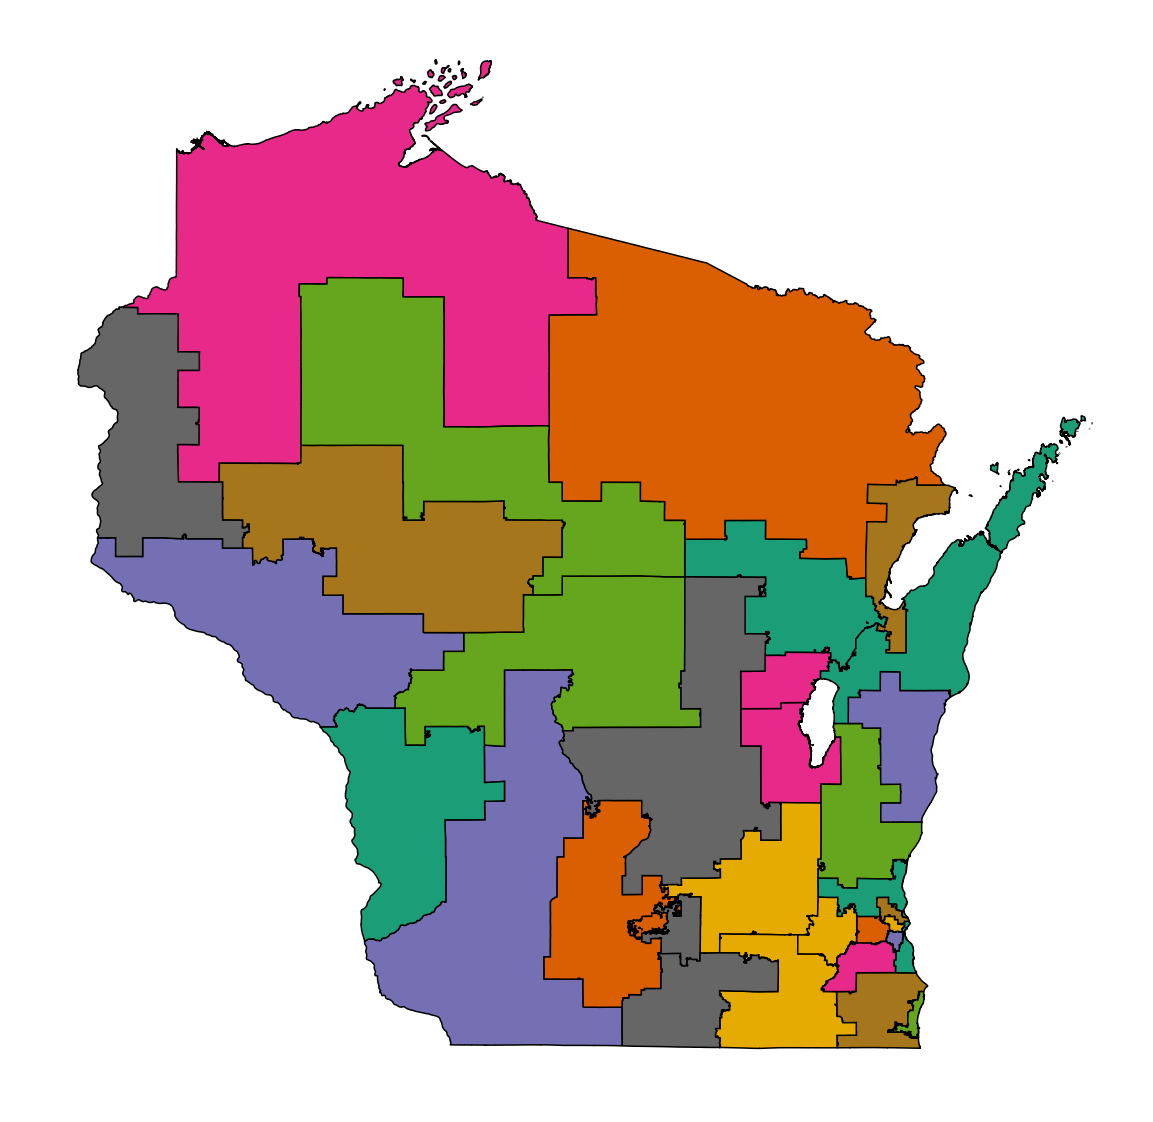

In [19]:
with fiona.open('data/districts/state_senate/Wisconsin_State_Senate_Districts.shp') as f:
    shapes = [shape(polygon['geometry']) for polygon in f]
    patches = [PolygonPatch(shp) for shp in shapes]

random.seed(38502)
random.shuffle(patches)
N = 8
colors = [plb.cm.Dark2(x) for x in range(N)]
for patch, color in zip(patches, cycle(colors)):
    patch.set_facecolor(color)
    patch.set_linewidth(1.5)

fig, ax = plt.subplots(figsize=(20,20))

for patch in patches:
    ax.add_patch(patch)
    
ax.relim()
ax.autoscale_view()
ax.axis('off');